#[SWCON253] Machine Learning
Teaching Assistant: HyunDong Cho (gusehd1113@khu.ac.kr)

Professor: Jinwoo Choi (jinwoochoi@khu.ac.kr)

---

# P1:  Pure Python만을 이용하여 Perceptron 구현 (10점)

### 학습목표
- Perceptron Python class를 직접 구현하면서 NN의 작동방법을 이해한다.
- 머신러닝 모델의 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해하고 설명 할 수 있다.

### 실습내용
Frank Rosenblatt의 classic perceptron binary classication(0 또는 1을 구분하는)을 구현합니다. <br>
여러분은 "Pure" 혹은 "vanilla" Python 함수만을 사용하여 구현해야합니다. 그러므로 시각화를 위한 matplotlib 이외의 패키지는 사용하지마세요.

실습은 다음 순서로 진행됩니다. 학생분들께서는 **<구현>**과 **<작성>**에 해당하는 부분을 수행해주시면 됩니다.

- S1. Perceptron 구현 및 분석
    - 1) 실습에서 사용되는 패키지 import
    - 2) 주어진 데이터셋 loading
    - 3) Perceptron Model 구현 **<구현>**
    - 4) Perceptron Model 학습
    - 5) Perceptron Model 검증
    - 6) Decision Boundary 시각화

<br>

- S2. Discussion **<작성>**

### 점수
- Perceptron model 구현: 각 함수별로 2점


### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.

## S1.  Perceptron 구현 및 분석

## 1-1) Imports
**수정하지 마세요.** HW1에서는 "pure" python으로만 코드를 작성합니다. `matplotlib`이외의 패키지는 사용하지 않습니다.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1-2) Loading the Dataset
**수정하지 마세요.** 

코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

두 개의 class(0, 1)를 갖는 2차원 데이터이며, class0은 -1의 값을 가지고 class1은 1의 값을 가집니다.

In [9]:
# CSV 파일을 읽기
X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    classes = [-1, 1]
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
#         y.append(int(values[-1])
        y.append(classes[int(values[-1])])
        
print(len(X), len(y))
print(y)

100 100
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Dataset Split & Visualization

**수정하지 마세요.** 

Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [14]:
import random


# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

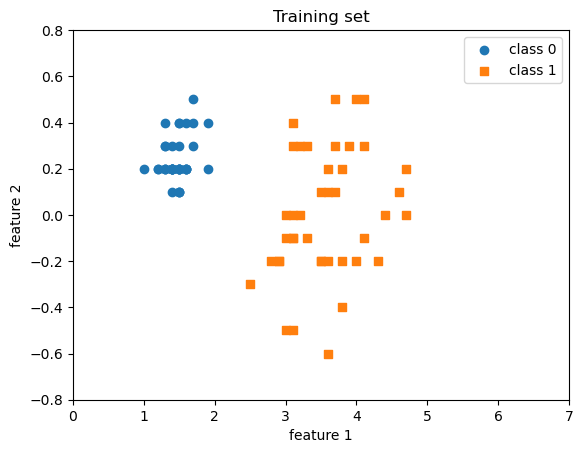

In [15]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 1-3) Perceptron model 구현
이 부분에서는 직접 `Perceptron model`을 구현해 봅니다.

Perceptron model은 생성자, forward, backward, train, evaluation 다섯개 함수로 이루어져 있습니다.
- `__init__` 생성자에서는 Perceptron의 weights와 bias를 초기화합니다.
- `forward`에서는 input을 Perceptron의 가중치를 이용해서 예측을 수행합니다.
- `backward`에서는 Perceptron의 가중치를 학습하기 위해 에러를 계산합니다.
- `train`에서는 Perceptron을 학습하는 과정으로 `forward`와 `backward`를 차례로 반복하여 Perceptron의 가중치를 업데이트 합니다.
- `evaluation`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다. **(주의: Accuracy 계산)**

아래 `# <your code>` 부분을 채워 넣어서 Perceptron class를 직접 작성하여 구현하세요.

**세부 구현 사항:**
- weights는 랜덤으로 초기화, bias는 0으로 초기화한다.
- activation function은 입력값을 기준으로 `0 초과는 1, 0 이하는 -1`을 출력하게 한다.
- Cost Function은 MSE 또는 Cross-Entropy가 아닌 $J(w) = -y(w^Tx)$를 사용한다. , $x\in Y$는 **틀린 샘플의 집합** 

#### Perceptron
![Perceptron](https://www.researchgate.net/profile/Daniel-Alvarez-34/publication/315788933/figure/fig3/AS:479799241121795@1491404461957/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the.png)
출처: https://www.researchgate.net/figure/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the_fig3_315788933

In [27]:
class Perceptron():
    def __init__(self, num_features):
        self.weights = [ random.random() *0.001 for i in range(num_features)] # <your code> initialization
        self.bias = 0 # <your code> initialization
        self.lr = 0.01
        
    def forward(self, x):
        linear = sum(x[i]*self.weights[i] for i in range(len(self.weights))) + self.bias # <your code> compute weighted sum
        prediction =  1 if linear > 0 else -1   # <your code> apply activation 
        return prediction
        
    def backward(self, x, y):
        prediction = self.forward(x)
        error = y - prediction
         # <your code> to compute the prediction error
        return error
        
    def train(self, x, y, epochs):
        # epochs 만큼 학습
        for e in range(epochs):
            # Each data point (Stochastic learning)
            for i in range(len(y)):
                x_, y_ = x[i], y[i]
                error = self.backward(x_, y_)
                if y_ != self.forward(x_):
                    update_term = error / 2
                    for k in range(len(self.weights)):
                        self.weights[k] += self.lr*update_term*x_[k]
                    self.bias += self.lr*update_term
                    # <your code> to update the weights and bias
                    
    def evaluate(self, x, y):
        # <your code> to compute the prediction accuracy    
        correct = 0
        for i in range(len(y)):
            x_, y_ = x[i], y[i]
            if self.forward(x_) == y_:
                correct += 1
        accuracy =  correct / len(y)
        return accuracy

## 1-4) Perceptron 학습

작성한 Perceptron을 Trainset을 이용해 5 epoch 학습하고 학습된 weight, bias를 print합니다.

In [28]:
ppn = Perceptron(num_features=2)  # 위에서 구현한 Perceptron 모델 정의
ppn.train(X_train, y_train, 10)    # 10 epoch 학습

# 학습된 모델의 weight, bias 출력
print(ppn.weights)
print(ppn.bias)

[0.018629990709724237, -0.012766626815913841]
-0.04


## 1-5) 모델 평가
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [29]:
# Train dataset에서 성능 평가
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [30]:
# Test dataset에서 성능 평가
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


## 1-6) Decision Boundary
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

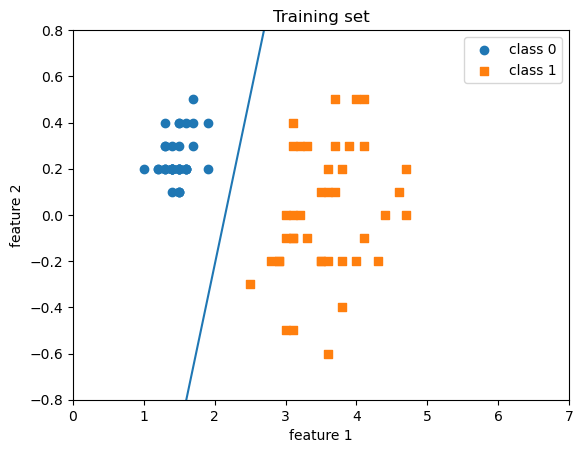

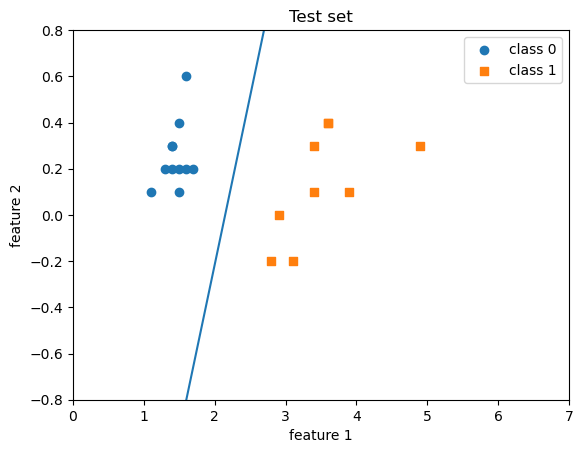

In [31]:
### Train 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

### Test 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == -1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## S2. Discussion

**1) 예시에서 사용된 activation 함수 이외의 어떤 함수가 있는지 찾아보고 설명해보세요.**

[답변작성]
현대의 신경망에서 대표적인 활성화 함수들은 다음과 같습니다.

1. 시그모이드 함수 (Sigmoid Function)
수식: σ(x)= 1 / ( 1+e^(−x) ) 
출력을 0과 1 사이의 값으로 압축합니다. 이 특성 때문에 특정 클래스에 속할 확률을 나타내는 이진 분류 문제의 출력층에서 주로 사용됩니다. 하지만 입력값이 매우 크거나 작아질수록 기울기가 0에 가까워지는 기울기 소실(Vanishing Gradient) 문제가 발생하여 깊은 신경망에서는 학습이 어려워질 수 있습니다.

2. 하이퍼볼릭 탄젠트 함수 (Hyperbolic Tangent, tanh)
수식: tanh(x)= { e^x - e^(-x) } / { e^x + e^(-x) }
 시그모이드 함수와 유사한 S자 형태를 가지지만, 출력 범위가 -1과 1 사이입니다. 출력값의 중심이 0이기 때문에 시그모이드 함수보다 학습 효율이 좋은 경향이 있습니다. 그러나 이 함수 역시 기울기 소실 문제가 발생할 수 있습니다.

**2) Perceptron 하나로 풀 수 없는 문제는 어떤것이 있는지 왜 그런지 설명해보세요.**

[답변작성]
대표적인 예시: XOR 문제
XOR(Exclusive OR) 문제는 단일 퍼셉트론의 한계를 보여주는 가장 대표적인 예시입니다. 
XOR 연산의 진리표에서 데이터 포인트를 2차원 평면에 나타내면 다음과 같습니다.
Class 0: (0, 0), (1, 1)
Class 1: (0, 1), (1, 0)
어떤 직선을 긋더라도 Class 0과 Class 1을 완벽하게 분리할 수 없습니다. 
두 클래스를 나누려면 곡선이나 두 개 이상의 직선이 필요합니다. 
단일 퍼셉트론은 오직 하나의 직선 경계만 만들 수 있으므로 XOR 문제를 해결하지 못합니다.

결론부터 말하면, 단일 퍼셉트론(Single Perceptron)은 선형적으로 분리할 수 없는(non-linearly separable) 문제는 풀 수 없습니다.

이유:
단일 퍼셉트론은 입력 데이터들을 하나의 직선(2차원), 평면, 또는 초평면(고차원)으로 나누어 두 개의 클래스로 분류하는 선형 분류기(Linear Classifier)입니다. 
즉, 결정 경계(Decision Boundary)가 직선 형태로만 나타납니다.
따라서 데이터의 분포가 복잡하여 직선 하나만으로는 두 클래스를 완벽하게 나눌 수 없는 경우에는 단일 퍼셉트론으로 문제를 해결할 수 없습니다.

이러한 한계는 훗날 여러 개의 퍼셉트론을 층으로 쌓은 다층 퍼셉트론(Multi-Layer Perceptron, MLP), 즉 딥러닝의 개념으로 이어지게 됩니다. 
MLP는 여러 개의 선형 경계를 조합하여 비선형적인 결정 경계를 만들어 XOR와 같은 복잡한 문제를 해결할 수 있습니다.
